In [ ]:
# Problem Definition
# D(i, j) is a function which gives the edit distance (cost) between two strings, 
# X and Y with lengths M and N respectively, 
# where 0 <= i <= M, 0 <= j <= N holds true.

# X is the original string and Y is the target string

# Assumptions
# Editing can be done in 3 ways
# - Insertion - Cost 1
# - Deletion - Cost 1
# - Substitution - Cost 2 (Levenshtein distance)

# Initialization
# D(i, 0) = i
# D(0, j) = j
# The cost of deleting 'i' number of characters from X is the length 'i'.
# Similary, the cost of inserting 'j' number of characters from an empty string is the length 'j'.

# Main function
# D(i, j) = min(D1(i, j), D2(i,j), D3(i,j))
# Where,
# D1(i, j) = D(i-1, j) + 1
# D2(i, j) = D(i, j-1) + 1
# D3(i, j) = D(i-1, j-1) + (X(i) == Y(j)) ? 0 : 2

In [35]:
import numpy as np
from enum import Enum

class Pointer(Enum):
    LEFT = 1
    DOWN = 2
    DIAG = 3

def get_edit_distance(X, Y):
    # Create a matrix of (M + 1) x (N + 1)
    # + 1 for i -> null and null -> j case
    
    distance_matrix = np.zeros( (len(X) + 1, len(Y) + 1) )
    pointer_stack = []
                               
    for i in range(distance_matrix.shape[0]):
        for j in range(distance_matrix.shape[1]):
            if i == 0 and j == 0:
                distance_matrix[i][j] = 0
                continue
                               
            if i == 0:
                distance_matrix[0][j] = j
                continue
                               
            if j == 0:
                distance_matrix[i][0] = i
                continue
                               
            d1 = distance_matrix[i-1][j] + 1
            d2 = distance_matrix[i][j-1] + 1
            d3 = distance_matrix[i-1][j-1] + (0 if X[i-1] == Y[j-1] else 2)
            
            dst_array = np.array([d1, d2, d3])
            index_min = np.argmin(dst_array)
            
            pointer = None
            if index_min == 0:
                pointer = Pointer.LEFT
            elif index_min == 1:
                pointer = Pointer.DOWN
            else:
                pointer = Pointer.DIAG
                
            pointer_stack.append(pointer)                       
            distance_matrix[i][j] = dst_array[index_min]
            
    return distance_matrix, pointer_stack

In [37]:
matrix, pointer = get_edit_distance("INTENTION", "EXECUTION")
print(matrix)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 1.  2.  3.  4.  5.  6.  7.  6.  7.  8.]
 [ 2.  3.  4.  5.  6.  7.  8.  7.  8.  7.]
 [ 3.  4.  5.  6.  7.  8.  7.  8.  9.  8.]
 [ 4.  3.  4.  5.  6.  7.  8.  9. 10.  9.]
 [ 5.  4.  5.  6.  7.  8.  9. 10. 11. 10.]
 [ 6.  5.  6.  7.  8.  9.  8.  9. 10. 11.]
 [ 7.  6.  7.  8.  9. 10.  9.  8.  9. 10.]
 [ 8.  7.  8.  9. 10. 11. 10.  9.  8.  9.]
 [ 9.  8.  9. 10. 11. 12. 11. 10.  9.  8.]]
81


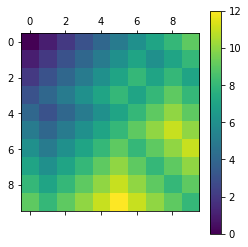

In [23]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()
plt.show()